(60000, 28, 28, 1) (10000, 28, 28, 1)
the label of this image is 5 


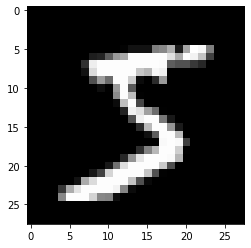

In [32]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, BatchNormalization, MaxPool2D
from tensorflow.keras import Model
from numpy import *
import matplotlib.pyplot as plt

# Task 2 (5 pts)
# Image classifier (MNIST) using ConvNet
#
# Requirement: 
#   a) Build ConvNet model using Tensorflow Keras package
#   b) Use tf.keras.models.Sequential to build a Conv -> MaxPool -> Conv -> MaxPool -> Dense -> Dense model.
#       print out your ConvNet using model.summary
#   c) Train your model using TWO different optimizers, and Evaluate your models using model.evaluate
#   d) Evalaute single image using model.predict. 
#     Specifically, plot out the input image in Jupyter, print the output of model.predict, and finalize the label

# Create inputs and labels for training and testing sets using MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train, x_test = x_train / 255.0, x_test / 255.0
print(x_train.shape, x_test.shape)

# Sample Image Test
sample1 = x_train[0].reshape(28,28)
plt.gray()
plt.imshow(sample1)
print("the label of this image is %d " % y_train[0])

# Accumulating data into an official training and testing data set
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

In [33]:
# ConvNet Model
model = tf.keras.models.Sequential([
    Conv2D(28, kernel_size=(3,3), input_shape=(28, 28, 1), padding='same'),
    MaxPool2D(pool_size=2, strides=2),
    Conv2D(56, kernel_size=(3,3), padding='same'),
    MaxPool2D(pool_size=2, strides=2),
    Flatten(),
    Dense(32, input_dim=4, activation='relu'), # hidden layer (32 nuerons) 
    #BatchNormalization(),
    Dense(10, activation='softmax')  # output layer
])
print(model.summary())

#Optimizer 1
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, 
          batch_size=64,
          verbose=1, shuffle=True, validation_freq=1)

model.evaluate(x_test, y_test, verbose=2)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 28, 28, 28)        280       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 14, 14, 28)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 14, 56)        14168     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 7, 7, 56)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 2744)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 32)                87840     
_________________________________________________________________
dense_17 (Dense)             (None, 10)               

[0.05882850523905363, 0.9826]

In [34]:
#Optimizer 2
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, 
          batch_size=64,
          verbose=1, shuffle=True, validation_freq=1)

model.evaluate(x_test, y_test, verbose=2)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 36s 603us/sample - loss: 0.0147 - accuracy: 0.9955
Epoch 2/5
60000/60000 [==============================] - 37s 619us/sample - loss: 0.0118 - accuracy: 0.9967
Epoch 3/5
60000/60000 [==============================] - 38s 626us/sample - loss: 0.0107 - accuracy: 0.9972
Epoch 4/5
60000/60000 [==============================] - 34s 567us/sample - loss: 0.0100 - accuracy: 0.9972
Epoch 5/5
60000/60000 [==============================] - 37s 618us/sample - loss: 0.0094 - accuracy: 0.9976
10000/10000 - 2s - loss: 0.0393 - accuracy: 0.9884


[0.03931828884310526, 0.9884]

the label of this image is 3 



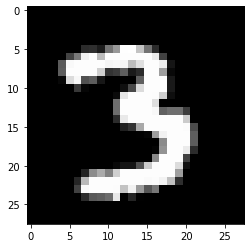

In [42]:
# Evaluate single image
sample2 = x_test[500].reshape(28,28)
plt.gray()
plt.imshow(sample2)
print("the label of this image is %d \n" % y_test[500])

In [43]:
# Predit single image
output = model.predict(x_test[500].reshape(1, 28, 28, 1))
print("Softmax", output) 
print("Label", argmax(output))

Softmax [[7.9750215e-20 2.8361879e-16 1.4560811e-13 1.0000000e+00 9.0221198e-17
  2.9632132e-13 3.0626177e-23 5.0560350e-15 2.1870472e-12 1.8016422e-09]]
Label 3


the label of this image is 0 

(420, 364, 4)
(28, 28, 1)

 Softmax [[9.98831809e-01 1.65469743e-12 2.05645975e-07 1.36529819e-08
  8.64138448e-12 7.14677340e-09 7.01657186e-08 1.09611396e-10
  5.42484668e-06 1.16256054e-03]]
Label 0


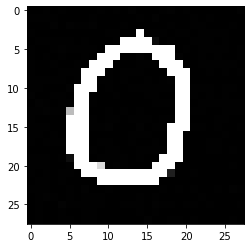

In [63]:
# Task 3
# Test your ConvNet trained in Task 2 with your own digit writings.
# Requirement
# a) Inference on your own image using model.predict and then generate the labels
# b) Plot your original writing (img) and the resized image (input of the model).
# c) Test 10 images which cover 0 - 9.

from matplotlib.image import imread
from IPython.display import Image

# ZERO
Image(filename='zero.png') 

img = imread('zero.png')
print("the label of this image is 0 \n")
print(img.shape)
myimg = tf.image.resize(img.reshape(img.shape), (28,28))
grascale_img = tf.image.rgb_to_grayscale(myimg[:,:,:3])
plt.imshow(grascale_img.numpy().reshape(28,28))
print(grascale_img.shape)

output = model.predict(grascale_img.numpy().reshape(1,28,28,1))
print("\n Softmax",output) 
print("Label", argmax(output))

the label of this image is 1 

(450, 344, 4)
(28, 28, 1)

 Softmax [[6.6321959e-10 9.9999809e-01 1.1827020e-06 8.8622151e-08 1.9209372e-07
  1.7390064e-08 6.3311449e-09 2.2441878e-08 3.8046855e-07 2.9460381e-08]]
Label 1


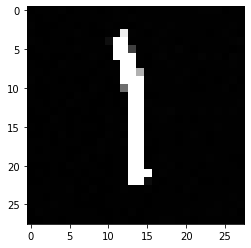

In [64]:
# ONE
Image(filename='one.png') 

img = imread('one.png')
print("the label of this image is 1 \n")
print(img.shape)
myimg = tf.image.resize(img.reshape(img.shape), (28,28))
grascale_img = tf.image.rgb_to_grayscale(myimg[:,:,:3])
plt.imshow(grascale_img.numpy().reshape(28,28))
print(grascale_img.shape)

output = model.predict(grascale_img.numpy().reshape(1,28,28,1))
print("\n Softmax",output) 
print("Label", argmax(output))

the label of this image is 2 

(458, 394, 4)
(28, 28, 1)

 Softmax [[1.1585841e-13 7.5171475e-12 1.0000000e+00 1.5360176e-12 1.1210271e-17
  2.0441205e-19 4.7710018e-13 6.8515060e-16 1.2100325e-11 4.8252939e-15]]
Label 2


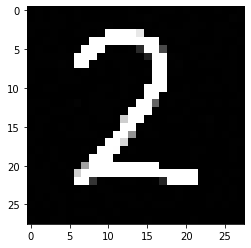

In [65]:
# TWO
Image(filename='two.png') 

img = imread('two.png')
print("the label of this image is 2 \n")
print(img.shape)
myimg = tf.image.resize(img.reshape(img.shape), (28,28))
grascale_img = tf.image.rgb_to_grayscale(myimg[:,:,:3])
plt.imshow(grascale_img.numpy().reshape(28,28))
print(grascale_img.shape)

output = model.predict(grascale_img.numpy().reshape(1,28,28,1))
print("\n Softmax",output) 
print("Label", argmax(output))

the label of this image is 3 

(506, 418, 4)
(28, 28, 1)

 Softmax [[2.2020529e-16 5.9261855e-15 1.8319312e-09 1.0000000e+00 5.1574427e-17
  9.2766778e-10 1.4802634e-14 9.1903677e-13 3.9988279e-08 2.4814952e-11]]
Label 3


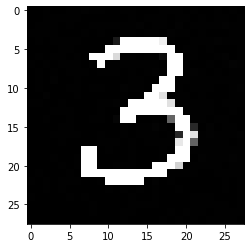

In [66]:
# THREE
Image(filename='three.png') 

img = imread('three.png')
print("the label of this image is 3 \n")
print(img.shape)
myimg = tf.image.resize(img.reshape(img.shape), (28,28))
grascale_img = tf.image.rgb_to_grayscale(myimg[:,:,:3])
plt.imshow(grascale_img.numpy().reshape(28,28))
print(grascale_img.shape)

output = model.predict(grascale_img.numpy().reshape(1,28,28,1))
print("\n Softmax",output) 
print("Label", argmax(output))

the label of this image is 4 

(542, 474, 4)
(28, 28, 1)

 Softmax [[9.9051592e-15 2.4766245e-10 6.8614579e-11 9.9899244e-09 9.9999928e-01
  4.0381121e-07 7.5571762e-09 1.9484747e-11 3.0403228e-07 3.0733947e-08]]
Label 4


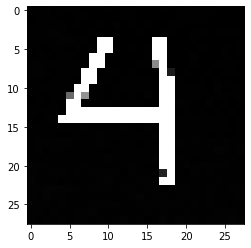

In [67]:
# FOUR
Image(filename='four.png') 

img = imread('four.png')
print("the label of this image is 4 \n")
print(img.shape)
myimg = tf.image.resize(img.reshape(img.shape), (28,28))
grascale_img = tf.image.rgb_to_grayscale(myimg[:,:,:3])
plt.imshow(grascale_img.numpy().reshape(28,28))
print(grascale_img.shape)

output = model.predict(grascale_img.numpy().reshape(1,28,28,1))
print("\n Softmax",output) 
print("Label", argmax(output))

the label of this image is 5 

(438, 358, 4)
(28, 28, 1)

 Softmax [[3.1448510e-15 8.3842210e-19 9.5759501e-13 1.7923809e-04 5.5259344e-16
  9.9982005e-01 7.1873052e-07 8.2847667e-09 3.7118399e-09 1.6773559e-08]]
Label 5


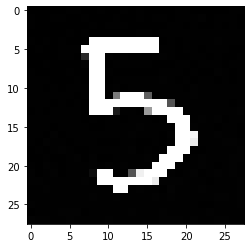

In [68]:
# FIVE
Image(filename='five.png') 

img = imread('five.png')
print("the label of this image is 5 \n")
print(img.shape)
myimg = tf.image.resize(img.reshape(img.shape), (28,28))
grascale_img = tf.image.rgb_to_grayscale(myimg[:,:,:3])
plt.imshow(grascale_img.numpy().reshape(28,28))
print(grascale_img.shape)

output = model.predict(grascale_img.numpy().reshape(1,28,28,1))
print("\n Softmax",output) 
print("Label", argmax(output))

the label of this image is 6 

(494, 380, 4)
(28, 28, 1)

 Softmax [[3.17313358e-08 1.25568203e-13 1.96403221e-06 1.27925858e-01
  1.58392955e-04 1.54027000e-01 7.17148542e-01 1.02517606e-10
  4.26326762e-04 3.11899610e-04]]
Label 6


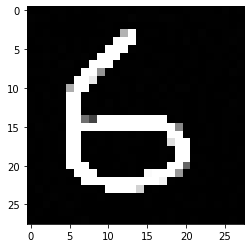

In [69]:
# SIX
Image(filename='six.png') 

img = imread('six.png')
print("the label of this image is 6 \n")
print(img.shape)
myimg = tf.image.resize(img.reshape(img.shape), (28,28))
grascale_img = tf.image.rgb_to_grayscale(myimg[:,:,:3])
plt.imshow(grascale_img.numpy().reshape(28,28))
print(grascale_img.shape)

output = model.predict(grascale_img.numpy().reshape(1,28,28,1))
print("\n Softmax",output) 
print("Label", argmax(output))

the label of this image is 7 

(556, 512, 4)
(28, 28, 1)

 Softmax [[9.9091416e-08 2.3258012e-03 3.0138129e-02 5.8649238e-03 2.5788970e-06
  6.2500582e-08 1.8030155e-09 9.6104974e-01 3.3603367e-04 2.8249944e-04]]
Label 7


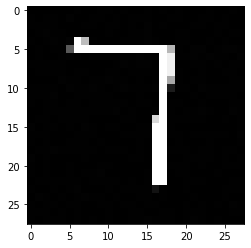

In [77]:
# SEVEN
Image(filename='seven.png') 

img = imread('seven.png')
print("the label of this image is 7 \n")
print(img.shape)
myimg = tf.image.resize(img.reshape(img.shape), (28,28))
grascale_img = tf.image.rgb_to_grayscale(myimg[:,:,:3])
plt.imshow(grascale_img.numpy().reshape(28,28))
print(grascale_img.shape)

output = model.predict(grascale_img.numpy().reshape(1,28,28,1))
print("\n Softmax",output) 
print("Label", argmax(output))

the label of this image is 8 

(514, 370, 4)
(28, 28, 1)

 Softmax [[1.1382461e-12 7.7268666e-15 2.7048559e-09 9.1654067e-07 4.2193279e-14
  7.2550321e-09 8.0345945e-11 1.9319178e-11 9.9999905e-01 7.1583425e-14]]
Label 8


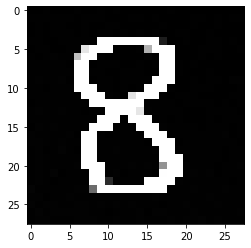

In [71]:
# EIGHT
Image(filename='eight.png') 

img = imread('eight.png')
print("the label of this image is 8 \n")
print(img.shape)
myimg = tf.image.resize(img.reshape(img.shape), (28,28))
grascale_img = tf.image.rgb_to_grayscale(myimg[:,:,:3])
plt.imshow(grascale_img.numpy().reshape(28,28))
print(grascale_img.shape)

output = model.predict(grascale_img.numpy().reshape(1,28,28,1))
print("\n Softmax",output) 
print("Label", argmax(output))

the label of this image is 9 

(566, 432, 4)
(28, 28, 1)

 Softmax [[4.4117977e-11 1.1407169e-08 8.1427174e-07 1.5968834e-03 2.5196081e-01
  8.0769360e-06 8.5064213e-09 2.0817353e-07 7.9874866e-02 6.6655833e-01]]
Label 9


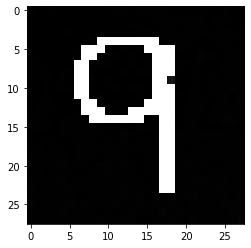

In [75]:
# NINE
Image(filename='nine.png') 

img = imread('nine.png')
print("the label of this image is 9 \n")
print(img.shape)
myimg = tf.image.resize(img.reshape(img.shape), (28,28))
grascale_img = tf.image.rgb_to_grayscale(myimg[:,:,:3])
plt.imshow(grascale_img.numpy().reshape(28,28))
print(grascale_img.shape)

output = model.predict(grascale_img.numpy().reshape(1,28,28,1))
print("\n Softmax",output) 
print("Label", argmax(output))